<img src="../../data/images/gempy_logo.png" />

# <center> From Maps to Models - Tutorials for structural geological modeling using GemPy and GemGIS</center>

# Example 1 - Folded Layers

This example will show how to convert the geological map below using ``GemGIS`` to a `GemPy` model. This example is based on digitized data. The area is 3942 m wide (W-E extent) and 2710 m high (N-S extent). The vertical extent varies between -200 m and 1000 m. The model represents two folded layers (purple and blue) above a basement (yellow).

<div class="alert alert-block alert-success">
<b>In this tutorial, you will learn the following:</b> <br>
- How to build your fourth <b>GemPy</b> model with input data generated through <b>GemGIS</b><br>
- How to build a GemPy model with folded layers<br>
- How to obtain the the fold axis of a structure<br>
- How to extract contour lines from a <b>PyVista</b> depth map and to save them as GeoDataFrame<br>
- How to convert a depth map to an array/raster<br>
- How to convert contour lines from that raster<br>
</div>

## Your Tasks


1. Georeference the map in QGIS given the dimensions above using the coordinate reference system with the EPSG code 4326
2. Digitize the layer boundaries (including a `formation` column) and the topographic lines (including a `Z` column)
3. Digitize so-called strike lines for the different layers. The orientations used for `GemPy` will be calculated from the strike lines.

## Contents

1. [Installing GemPy and GemGIS](#installing-gempy)
2. [Importing Libraries](#importing-libraries)
3. [Data Preparation](#data-preparation)
    1. [Creating Digital Elevation Model from Contour lines](#creating-digital-elevation-model-from-contour-lines)
        1. [Loading Contour Lines](#loading-contour-lines)
        2. [Plotting Contour Lines](#plotting-contour-lines)
        3. [Interpolating Contour Lines](#interpolating-contour-lines)
        4. [Plotting the raster](#plotting-the-raster)
        5. [Saving the raster to disc](#saving-the-raster-to-disc)
        6. [Opening raster](#opening-raster)
    2. [Processing Stratigraphic Boundaries](#processing-stratigraphic-boundaries)
        1. [Opening Stratigraphic Boundaries](#opening-stratigraphic-boundaries)
        2. [Plotting Stratigraphic Boundaries](#plotting-stratigraphic-boundaries)
        3. [Extracting Z coordinates from Digital Elevation Model](#extracting-z-coordinates-from-digital-elevation-model)
        4. [Plotting the Interface Points](#plotting-the-interface-points)
    3. [Processing Orientations](#processing-orientations)
        1. [Orientations from Strike Lines](#orientations-from-strike-lines)
        2. [Plotting Strike Lines](#plotting-strike-lines)
        2. [Loading Strike Lines](#loading-strike-lines)
        3. [Plotting Strike Lines](#plotting-strike-lines)
        4. [Calculate Orientations for each formation](#calculate-orientations-for-each-formation)
        5. [Merging Orientations for GemPy](#merging-orientations-for-gempy)
        6. [Plotting Orientations](#plotting-orientations)
4. [GemPy Model calculation](#gempy-model-calculation)
    1. [Creating the GemPy Model](#creating-the-gempy-model)
    2. [Data Initiation](#data-initiation)
    3. [Inspecting the Surfaces](#inspecting-the-surfaces)
    4. [Inspecting the Input Data](#inspecting-the-input-data)
    5. [Map Stack to Surfaces](#map-stack-to-surfaces)
    6. [Showing the Number of Data Points](#showing-the-number-of-data-points)
    7. [Loading Digital Elevation Model](#loading-digital-elevation-model)
    8. [Defining Custom Section](#defining-custom-section)
    6. [Plotting Input Data in 2D](#plotting-the-input-data-in-2d)
    7. [Plotting Input Data in 3D](#plotting-the-input-data-in-3d)
    8. [Setting the Interpolator](#setting-the-interpolator)
    9. [Computing the Model](#computing-the-model)
5. [Model Visualization and Post-Processing](#model-visualization-and-post-processing)
    1. [Visualizing the computed model in 2D](#visualizing-the-computed-model-in-2d)
    2. [Visualizing the computed model in 3D](#visualizing-the-computed-model-in-3d)    
    3. [Post Processing](#post-processing)
        1. [Extracting the fold axis](#extracting-the-fold-axis)
        2. [Extracting contour lines from PyVista Mesh](#extracting-contour-lines-from-pyvista-mesh)
        3. [Converting PyVista Mesh to Array](#converting-pyvista-mesh-to-array)
        4. [Extracting Contour Lines from Raster](#extracting-contour-lines-from-raster)


<img src="../../data/images/example5/cover_example05.png" width=700/>
Source: Bennison, G.M. (1988): An Introduction to Geological Structures and Maps, page 22, figure 9, Springer Verlag Berlin, Heidelberg, New York, ISBN: 978-1-4615-9632-5

<a id='installing-gempy'></a>

# Installing GemPy and GemGIS

If you have not installed `GemPy` yet, please follow the [GemPy installation instructions](https://docs.gempy.org/installation.html) and the [GemGIS installation instructions](https://gemgis.readthedocs.io/en/latest/getting_started/installation.html). If you encounter any issues, feel free to open a new discussion at [GemPy Discussions](https://github.com/cgre-aachen/gempy/discussions) or [GemGIS Discussions](https://github.com/cgre-aachen/gemgis/discussions). If you encounter an error in the installation process, feel free to also open an issue at [GemPy Issues](https://github.com/cgre-aachen/gempy/issues) or [GemGIS Issues](https://github.com/cgre-aachen/gemgis/issues). There, the `GemPy` and `GemGIS` development teams will help you out. 

<a id='importing-libraries'></a>

# Importing Libraries

For this notebook, we need the `geopandas` library for the data preparation, `rasterio` for dealing with the created digital elevation model, `matplotlib` for plotting, `numpy` for some numerical calculations, `pandas` for manipulating `DataFrames` and of course the `gempy` and `gemgis` libraries. Any warnings that may appear can be ignored for now. The file path is set to load the data provided for this tutorial. 

In [1]:
import geopandas as gpd
import rasterio
import warnings
warnings.filterwarnings("ignore")
import gemgis as gg
import matplotlib.pyplot as plt
import numpy as np
import gempy as gp
import pyvista as pv
import pandas as pd

C:\Users\ale93371\AppData\Local\Temp\ipykernel_30296\547675048.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementatio

In [2]:
file_path = '../../data/example05_folded_layers/'

<a id='data-preparation'></a>
# Data Preparation

At his point, you should have the topographic contour lines (including a `Z` column) and the layer boundaries (including a `formation` column) digitized. If not, please generate the data before continuing with this tutorial. 

<a id='creating-digital-elevation-model-from-contour-lines'></a>
## Creating Digital Elevation Model from Contour Lines

The digital elevation model (DEM) will be created by interpolating the contour lines digitized from the georeferenced map using the `SciPy` [Radial Basis Function interpolation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Rbf.html) wrapped in `GemGIS`. The respective function used for that is `gg.vector.interpolate_raster()`. 


<img src="../../data/images/example5/dem_example05.png" width=700/>
Source: Bennison, G.M. (1988): An Introduction to Geological Structures and Maps, page 22, figure 9, Springer Verlag Berlin, Heidelberg, New York, ISBN: 978-1-4615-9632-5


<a id='loading-contour-lines'></a>
### Loading contour lines

First, the contour lines are loaded using `GeoPandas`. Please provide here the name of your shape file containing the digitized topographic contour lines. 

In [3]:
topo = gpd.read_file(file_path + 'topo5.shp')
topo.head()

,id,Z,geometry
0,None,700,"LINESTRING (1.53733 2299.19301, 29.19068 2272...."
1,None,600,"LINESTRING (81.14546 2708.12741, 130.58630 264..."
2,None,600,"LINESTRING (6.56521 403.68153, 56.00605 360.94..."
3,None,600,"LINESTRING (3278.04038 2.28896, 3308.20767 32...."
4,None,600,"LINESTRING (2258.21833 1964.00089, 2375.53558 ..."


<a id='plotting-contour-lines'></a>

### Plotting the contour lines

The contour lines are plotted using the built-in plotting function of `GeoPandas`. 

<Axes: >

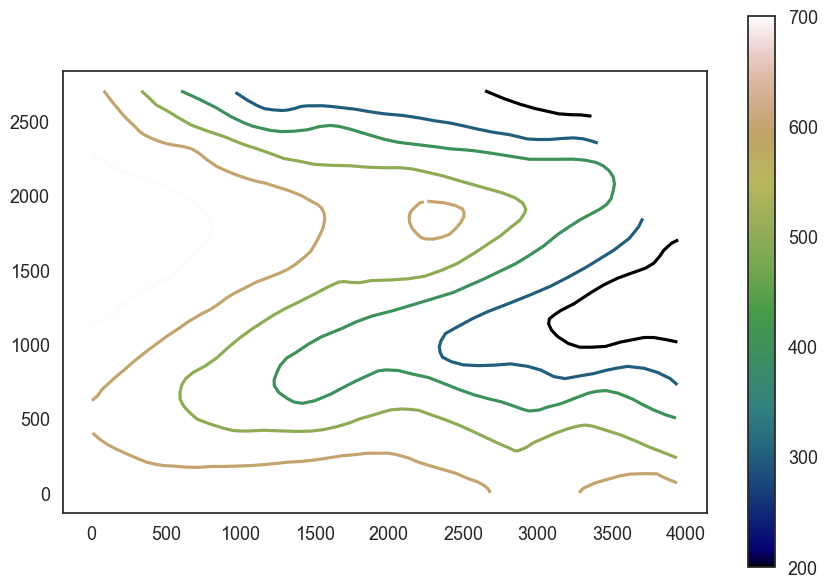

In [4]:
topo.plot(column='Z', aspect=1, legend=True, cmap='gist_earth')

<a id='interpolating-contour-lines'></a>

### Interpolating the contour lines

The digital elevation model (DEM) will be created by interpolating the contour lines digitized from the georeferenced map using the `SciPy` [Radial Basis Function interpolation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Rbf.html) wrapped in `GemGIS`. The respective function used for that is `gg.vector.interpolate_raster()`. 

There is also a [tutorial available for this task on the GemGIS Documentation page](https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/05_interpolating_rasters.html).

In [5]:
topo_raster = gg.vector.interpolate_raster(gdf=topo, value='Z', method='rbf', res=10)

<a id='plotting-the-raster'></a>

### Plotting the raster

The interpolated digital elevation model can be displayed using `matplotlib` and its `plt.imshow()` function and by providing the extent of the raster to align it with the contour lines. 

(0.0, 2710.0)

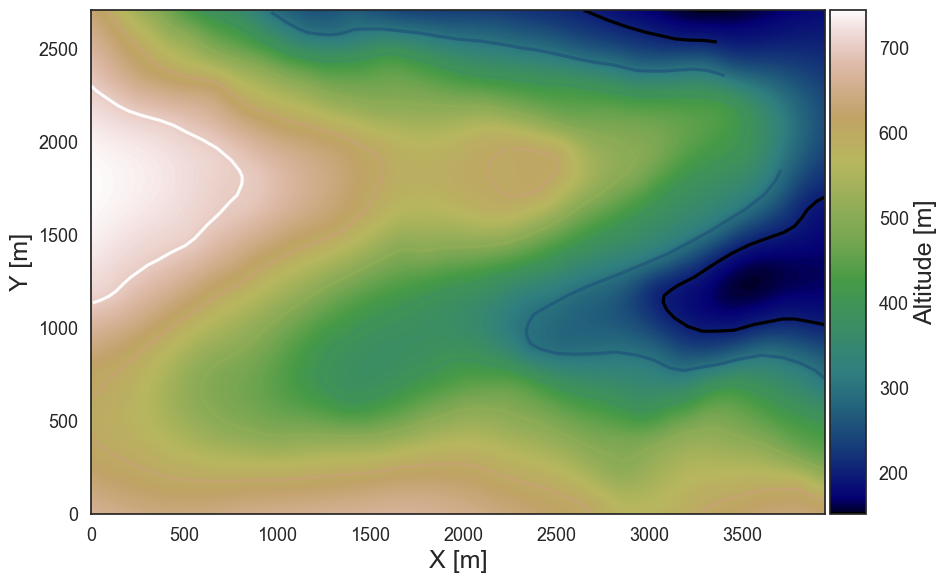

In [6]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
fix, ax = plt.subplots(1, figsize=(10, 10))
topo.plot(ax=ax, aspect='equal', column='Z', cmap='gist_earth')
im = plt.imshow(topo_raster, origin='lower', extent=[0, 3942, 0, 2710], cmap='gist_earth')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Altitude [m]')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_xlim(0, 3942)
ax.set_ylim(0, 2710)

### Saving the raster to disc

After the interpolation of the contour lines, the raster is saved to disc using `gg.raster.save_as_tiff()`. The function will not be executed as a raster is already provided with the example data. 

### Opening Raster

The previously computed and saved raster can now be opened using rasterio. 

In [7]:
topo_raster = rasterio.open(file_path + 'raster5.tif')

<a id='processing-stratigraphic-boundaries'></a>

## Processing Stratigraphic Boundaries

The interface points will be extracted from LineStrings digitized from the georeferenced map using QGIS. It is important to provide a `formation` name for each layer boundary. Up until now, only the `X` and `Y` position are stored in the vertices of the LineStrings. Using the digital elevation model created already, we will now sample the elevation model at the locations of the vertices to extract the height at this point as the stratigraphic boundary was mapped at the surface.

<img src="../../data/images/example5/interfaces_example05.png" width=700/>
Source: Bennison, G.M. (1988): An Introduction to Geological Structures and Maps, page 22, figure 9, Springer Verlag Berlin, Heidelberg, New York, ISBN: 978-1-4615-9632-5

<a id='opening-stratigraphic-boundaries'></a>

### Opening Stratigraphic Boundaries

The stratigraphic units are opened using `GeoPandas`.

In [8]:
interfaces = gpd.read_file(file_path + 'interfaces5.shp')
interfaces.head()

,id,formation,geometry
0,None,A,"LINESTRING (591.47548 2.28896, 609.07306 69.32..."
1,None,A,"LINESTRING (3448.15039 3.12694, 3500.10517 128..."
2,None,B,"LINESTRING (265.50113 1.45098, 290.64054 89.43..."
3,None,B,"LINESTRING (2284.19572 1.45098, 2264.08419 109..."
4,None,B,"LINESTRING (3480.83162 2222.93681, 3450.66433 ..."


<a id='plotting-stratigraphic-boundaries'></a>

### Plotting Stratigraphic Boundaries

Text(4.305555555555559, 0.5, 'Y [m]')

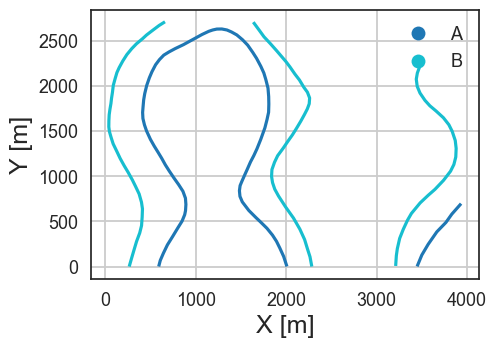

In [9]:
fig, ax = plt.subplots(1, figsize=(5,5))

interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')

plt.grid()
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')

<a id='extracting-z-coordinates-from-digital-elevation-model'></a>

### Extracting Z coordinates from Digital Elevation Model

The vertical position of the interface point will be extracted from the digital elevation model using the `GemGIS` function `gg.vector.extract_xyz()`. The resulting GeoDataFrame now contains single points including the information about the respective `formation` as well as the `X`, `Y`, and `Z` location. This is all we need as preparational steps to generate input data for `GemPy`. 

There is also a [tutorial available for this task on the GemGIS Documentation page](https://gemgis.readthedocs.io/en/latest/getting_started/tutorial/02_extract_xyz.html).

In [10]:
interfaces_coords = gg.vector.extract_xyz(gdf=interfaces, dem=topo_raster)
interfaces_coords = interfaces_coords.sort_values(by='formation', ascending=False)
interfaces_coords

,formation,geometry,X,Y,Z
94,B,POINT (412.14769 639.15400),412.15,639.15,538.20
129,B,POINT (2204.58759 299.77197),2204.59,299.77,578.98
120,B,POINT (345.10926 2463.43716),345.11,2463.44,588.11
121,B,POINT (412.98567 2520.41982),412.99,2520.42,547.54
122,B,POINT (456.56065 2560.64287),456.56,2560.64,518.60
...,...,...,...,...,...
61,A,POINT (1643.14078 1228.25417),1643.14,1228.25,436.22
62,A,POINT (1606.26964 1157.86382),1606.27,1157.86,419.63
63,A,POINT (1569.39851 1074.06579),1569.40,1074.07,402.09
64,A,POINT (1537.55526 1003.67544),1537.56,1003.68,390.91


<a id='plotting-the-interface-points'></a>

### Plotting the Interface Points

The interface points incuding their altitude (Z-) values and the digitized LineString can be plotted using `matplotlib`. 

(0.0, 2710.0)

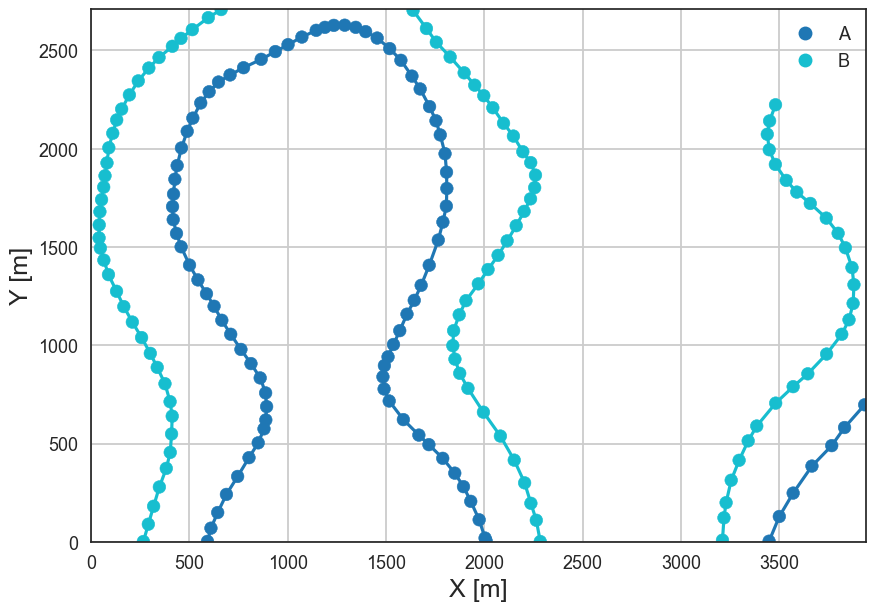

In [11]:
fig, ax = plt.subplots(1, figsize=(10, 10))

interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')
interfaces_coords.plot(ax=ax, column='formation', legend=True, aspect='equal')
plt.grid()
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_xlim(0, 3942)
ax.set_ylim(0, 2710)

<a id='processing-orientations'></a>

## Processing Orientations

For this example, orientations must be calculated yourself. They will be calculated using functions implemented in GemGIS and the previously digitized strike lines. 

<img src="../../data/images/example5/orientations_example05.png" width=700/>
Source: Bennison, G.M. (1988): An Introduction to Geological Structures and Maps, page 22, figure 9, Springer Verlag Berlin, Heidelberg, New York, ISBN: 978-1-4615-9632-5

<a id='orientations-strike-lines'></a>
### Orientations from Strike Lines

Strike lines connect outcropping stratigraphic boundaries (interfaces) of the same altitude. In other words: the intersections between topographic contours and stratigraphic boundaries at the surface. The height difference and the horizontal difference between two digitized lines is used to calculate the dip and azimuth and hence an orientation that is necessary for `GemPy`.

The calculation of orientations from strike lines has been implemented into `GemPy` for simple cases like these. In order to calculate the orientations, each set of strikes lines/LineStrings for one formation must be given an id number next to the altitude of the strike line. The id field is already predefined in QGIS. The strike line with the lowest altitude gets the id number `1`, the strike line with the highest altitude the the number according to the number of digitized strike lines. It is currently recommended to use one set of strike lines for each structural element of one formation as illustrated. 

<img src="../../data/images/fig3.png" width=500/>

By CrunchyRocks, after Karla Panchuck - https://openpress.usask.ca/physicalgeology/chapter/13-5-measuring-geological-structures/, CC BY 4.0, https://commons.wikimedia.org/w/index.php?curid=113554289


<img src="../../data/images/model1_strike_lines.png" width=500/>
Source: Powell, D. (1995): Interpretation geologischer Strukturen durch Karten - Eine praktische Anleitung mit Aufgaben und Lösungen, page 14, figure 8, Springer Verlag Berlin, Heidelberg, New York, ISBN: 978-3-540-58607-4.

In [12]:
strikes = gpd.read_file(file_path + 'strikes5.shp')
strikes

,id,formation,Z,geometry
0,2,B1,700,"LINESTRING (149.85985 2191.09355, 154.88773 12..."
1,1,B1,600,"LINESTRING (319.55086 2436.62179, 321.85531 91..."
2,3,A1,700,"LINESTRING (481.28106 2067.91045, 488.40390 14..."
3,2,A1,600,"LINESTRING (636.09793 2326.84636, 655.52860 17..."
4,1,A1,500,"LINESTRING (807.41253 2426.93264, 822.28668 45..."
5,2,A2,500,"LINESTRING (1725.62947 2204.02987, 1737.88493 ..."
6,1,A2,400,"LINESTRING (1556.25269 2469.04115, 1567.35593 ..."
7,1,B2,400,"LINESTRING (1890.81634 1193.00662, 1900.45311 ..."
8,2,B2,500,"LINESTRING (2062.18331 564.52138, 2056.31745 1..."
9,3,B2,600,"LINESTRING (2216.79068 1955.14972, 2236.48322 ..."


<a id='calculate-orientations-for-each-formation'></a>

### Calculate Orientations for each formation

The calculations will be calculated using the function `gg.vector.calculate_orientations_from_strike_lines()` where the strike lines for each single formation will be provided and calculated separately. The result is a `GeoDataFrame` ready to be used in `GemPy`.

In [13]:
orientations_a = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation'] == 'A'].sort_values(by='Z', ascending=True).reset_index())
orientations_a

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,33.31,89.37,450.00,POINT (3720.80823 1056.41583),1.00,A,3720.81,1056.42
1,33.83,89.86,550.00,POINT (3564.89152 1040.49420),1.00,A,3564.89,1040.49


In [14]:
orientations_a1 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation'] == 'A1'].sort_values(by='Z', ascending=True).reset_index())
orientations_a1

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,30.57,89.52,550.00,POINT (730.33143 1346.05587),1.00,A1,730.33,1346.06
1,32.70,89.47,650.00,POINT (565.32787 1500.47993),1.00,A1,565.33,1500.48


In [15]:
orientations_a2 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation'] == 'A2'].sort_values(by='Z', ascending=True).reset_index())
orientations_a2

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,30.80,269.62,450.00,POINT (1646.78076 1448.74774),1.00,A2,1646.78,1448.75


In [16]:
orientations_b1 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation'] == 'B1'].sort_values(by='Z', ascending=True).reset_index())
orientations_b1

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,30.99,89.85,650.00,POINT (236.53844 1689.66708),1.00,B1,236.54,1689.67


In [17]:
orientations_b2 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation'] == 'B2'].sort_values(by='Z', ascending=True).reset_index())
orientations_b2

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,31.99,269.44,450.00,POINT (1977.44255 1001.21387),1.00,B2,1977.44,1001.21
1,31.03,269.41,550.00,POINT (2142.94366 1038.39925),1.00,B2,2142.94,1038.40


In [18]:
orientations_b3 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation'] == 'B3'].sort_values(by='Z', ascending=True).reset_index())
orientations_b3

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,30.70,269.51,450.00,POINT (1970.00548 1806.95814),1.00,B3,1970.01,1806.96
1,31.88,269.85,550.00,POINT (2137.23492 1825.15802),1.00,B3,2137.23,1825.16


In [19]:
orientations_b4 = gg.vector.calculate_orientations_from_strike_lines(gdf=strikes[strikes['formation'] == 'B4'].sort_values(by='Z', ascending=True).reset_index())
orientations_b4

,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,31.77,89.41,250.00,POINT (3722.11758 1298.80163),1.00,B4,3722.12,1298.80
1,30.84,89.85,350.00,POINT (3554.52151 1304.87699),1.00,B4,3554.52,1304.88


<a id='merging-orientations-for-gempy'></a>

### Merging Orientations for GemPy

Since `GemPy` only takes one `DataFrame` for the necessary orientations, the single `DataFrames` are concatenated using `pd.concat()`. 

In [20]:
import pandas as pd
orientations = pd.concat([orientations_a, orientations_a1, orientations_a2, orientations_b1, orientations_b2, orientations_b3, orientations_b4]).reset_index()
orientations['formation'] = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
orientations

,index,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,0,33.31,89.37,450.00,POINT (3720.80823 1056.41583),1.00,A,3720.81,1056.42
1,1,33.83,89.86,550.00,POINT (3564.89152 1040.49420),1.00,A,3564.89,1040.49
2,0,30.57,89.52,550.00,POINT (730.33143 1346.05587),1.00,A,730.33,1346.06
3,1,32.70,89.47,650.00,POINT (565.32787 1500.47993),1.00,A,565.33,1500.48
4,0,30.80,269.62,450.00,POINT (1646.78076 1448.74774),1.00,A,1646.78,1448.75
5,0,30.99,89.85,650.00,POINT (236.53844 1689.66708),1.00,B,236.54,1689.67
6,0,31.99,269.44,450.00,POINT (1977.44255 1001.21387),1.00,B,1977.44,1001.21
7,1,31.03,269.41,550.00,POINT (2142.94366 1038.39925),1.00,B,2142.94,1038.40
8,0,30.70,269.51,450.00,POINT (1970.00548 1806.95814),1.00,B,1970.01,1806.96
9,1,31.88,269.85,550.00,POINT (2137.23492 1825.15802),1.00,B,2137.23,1825.16


<a id='plotting-the-orientations'></a>

### Plotting the Orientations

The orientations can be plotted using `matplotlib`.

(0.0, 2710.0)

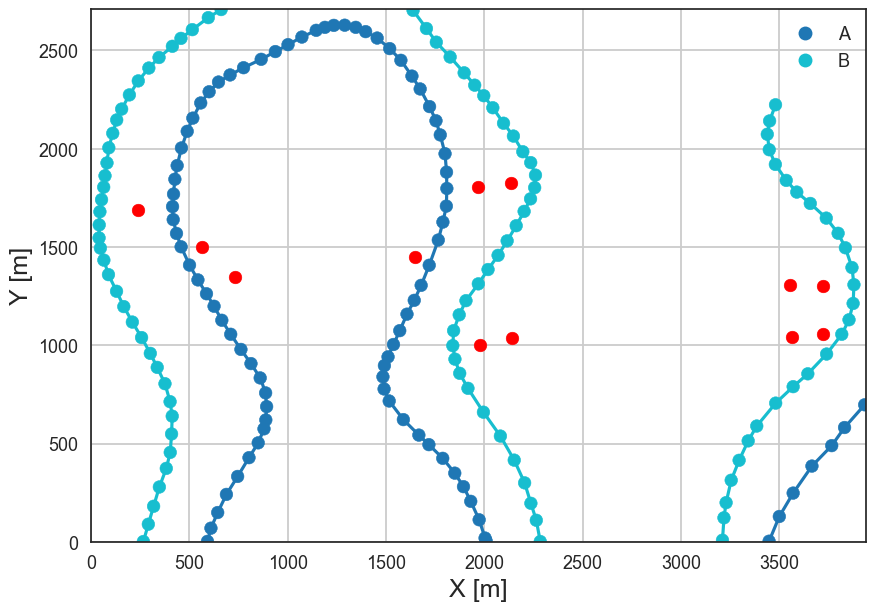

In [21]:
fig, ax = plt.subplots(1, figsize=(10, 10))

interfaces.plot(ax=ax, column='formation', legend=True, aspect='equal')
interfaces_coords.plot(ax=ax, column='formation', legend=True, aspect='equal')
orientations.plot(ax=ax, color='red', aspect='equal')
plt.grid()
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_xlim(0, 3942)
ax.set_ylim(0, 2710)

<a id='gempy-model-calculation'></a>

# GemPy Model Calculation


The creation of a `GemPy` Model follows particular steps which will be performed in the following:

1. Create new model: `gp.create_model()`
2. Data Initiation: `gp.init_data()`
3. Map Stack to Surfaces: `gp.map_stack_to_surfaces()`
4. [...]
5. Set the Interpolator: `gp.set_interpolator()`
6. Computing the Model: `gp.compute_model()`

<a id='creating-the-gempy-model'></a>

## Creating the GemPy Model

The first step is to create a new empty `GemPy` model by providing a name for it. 

In [22]:
geo_model = gp.create_model('Model5')
geo_model

Model5  2023-03-04 10:42

<a id='data-initiation'></a>

## Data Initiation

During this step, the `extent` of the model (`xmin`, `xmax`, `ymin`, `ymax`, `zmin`, `zmax`) and the `resolution` in `X`, `Y`and `Z` direction (`res_x`, `res_y`, `res_z`, equal to the number of cells in each direction) will be set using lists of values. 

The interface points (`surface_points_df`) and orientations (`orientations_df`) will be passed as `pandas` `DataFrames`. 

In [23]:
gp.init_data(geo_model, [0, 3942, 0, 2710, -200, 1000], [100, 100, 100],
             surface_points_df=interfaces_coords[interfaces_coords['Z'] != 0],
             orientations_df=orientations,
             default_values=True)

Active grids: ['regular']


Model5  2023-03-04 10:42

<a id='inspecting-the-surfaces'></a>

## Inspecting the Surfaces

The model consists of five different layers or surfaces now which all belong to the `Default series`. During the next step, the proper `Series` will be assigned to the surfaces. Using the `surfaces`-attribute again, we can check which layers were loaded.

In [24]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,B,Default series,1,#015482,1
1,A,Default series,2,#9f0052,2


<a id='inspecting-the-input-data'></a>

## Inspecting the Input Data

The loaded interface points and orientations can again be inspected using the `surface_points`- and `orientations`-attributes. Using the `df`-attribute of this object will convert the displayed table in a `pandas` `DataFrame`.

In [25]:
geo_model.surface_points.df.head()

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
94,412.15,639.15,538.20,0.30,0.41,0.51,B,Default series,1,1,0.00
129,2204.59,299.77,578.98,0.53,0.36,0.52,B,Default series,1,1,0.00
120,345.11,2463.44,588.11,0.29,0.64,0.52,B,Default series,1,1,0.00
121,412.99,2520.42,547.54,0.30,0.65,0.51,B,Default series,1,1,0.00
122,456.56,2560.64,518.60,0.30,0.65,0.51,B,Default series,1,1,0.00


In [26]:
geo_model.orientations.df.head()

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
0,3720.81,1056.42,450.00,0.72,0.46,0.50,0.55,0.01,0.84,33.31,89.37,1.00,A,Default series,2,1,0.01
1,3564.89,1040.49,550.00,0.70,0.46,0.51,0.56,0.00,0.83,33.83,89.86,1.00,A,Default series,2,1,0.01
2,730.33,1346.06,550.00,0.34,0.50,0.51,0.51,0.00,0.86,30.57,89.52,1.00,A,Default series,2,1,0.01
3,565.33,1500.48,650.00,0.32,0.52,0.53,0.54,0.00,0.84,32.70,89.47,1.00,A,Default series,2,1,0.01
4,1646.78,1448.75,450.00,0.46,0.51,0.50,-0.51,-0.00,0.86,30.80,269.62,1.00,A,Default series,2,1,0.01


<a id='map-stack-to-surfaces'></a>

## Map Stack to Surfaces

During this step, all two layers of the model are assigned to the `Strata1` series. We know that the layers modeled here are parallel. If the layers were not parallel as shown in the next models, multiple series would be defined. We will also add a `Basement` here (`geo_model.add_surfaces('Basement')`). The order within one series also defines the age relations within this series and has to be according to the depositional events of the layers.

In [27]:
gp.map_stack_to_surfaces(geo_model,
                         {
                          'Strata1': ('A', 'B'),
                         },
                         remove_unused_series=True)
geo_model.add_surfaces('Basement')

,surface,series,order_surfaces,color,id
0,B,Strata1,1,#015482,1
1,A,Strata1,2,#9f0052,2
2,Basement,Strata1,3,#ffbe00,3


<a id='showing-the-number-of-data-points'></a>

## Showing the Number of Data Points

You can also return the number of interfaces and orientations for each formation using `gg.utils.show_number_of_data_points()`

In [28]:
gg.utils.show_number_of_data_points(geo_model=geo_model)

,surface,series,order_surfaces,isBasement,isFault,isActive,hasData,color,vertices,edges,sfai,id,No. of Interfaces,No. of Orientations
0,B,Strata1,1,False,False,True,True,#015482,NaN,NaN,NaN,1,101,7
1,A,Strata1,2,False,False,True,True,#9f0052,NaN,NaN,NaN,2,87,5
2,Basement,Strata1,3,True,False,True,True,#ffbe00,NaN,NaN,NaN,3,0,0


<a id='loading-digital-elevation-model'></a>

## Loading Digital Elevation Model

`GemPy` is capable of including a topography into the modeling process. Here, we use the topography that we have interpolated in one of the previous steps. `GemPy` takes the file path of the raster/digital elevation model and loads it as grid into the `geo_model` object.

In [29]:
geo_model.set_topography(
    source='gdal', filepath=file_path + 'raster5.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  19.71      ,   13.55      , -194.        ],
       [  19.71      ,   13.55      , -182.        ],
       [  19.71      ,   13.55      , -170.        ],
       ...,
       [3937.01012658, 2685.        ,  182.10906982],
       [3937.01012658, 2695.        ,  181.02072144],
       [3937.01012658, 2705.        ,  179.95965576]])

<a id='defining-custom-section'></a>

## Defining Custom Section

It is possible to define straight (no bending) custom sections in `GemPy` that will be calculated additionally with a provided resolution and that can be displayed separately using `matplotlib`.

For this example, the bold black line indicates the location of the custom section. This custom section can be digitized with a LineString (line shape file) with vertices at both ends and loaded using `GeoPandas`. 

The function `gg.utils.to_section_dict()` converts the `GeoDataFrame` into a custom section dict before it can be set as section grid for the `geo_model` object and plotted using the built-in plotting function. 

In [30]:
custom_section = gpd.read_file(file_path + 'customsection5.shp')
custom_section_dict = gg.utils.to_section_dict(custom_section, section_column='name')
geo_model.set_section_grid(custom_section_dict)

Active grids: ['regular' 'topography' 'sections']


,start,stop,resolution,dist
Section1,"[6.565213969151387, 963.4523850507635]","[3931.665030709532, 366.8103975359992]","[100, 80]",3970.19


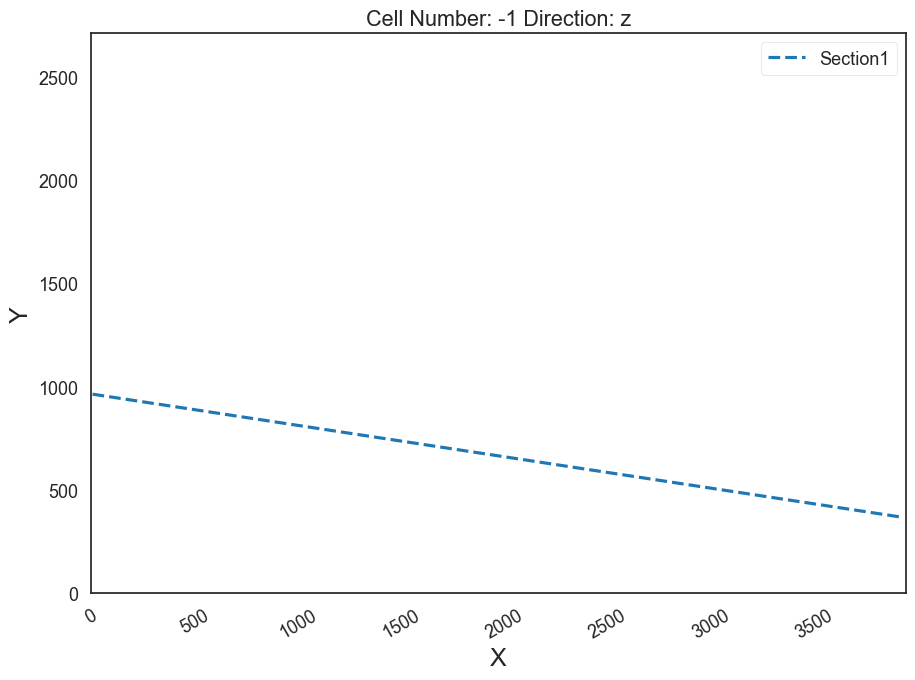

In [31]:
gp.plot.plot_section_traces(geo_model)

<a id='plotting-the-input-data-in-2d'></a>

## Plotting the input data in 2D using Matplotlib

The input data can now be visualized in 2D using `matplotlib`. This might for example be useful to check if all points and measurements are defined the way we want them to. Using the function `plot_2d()`, we attain a 2D projection of our data points onto a plane of chosen direction (we can choose this attribute to be either `'x'`, `'y'`, or `'z'`).

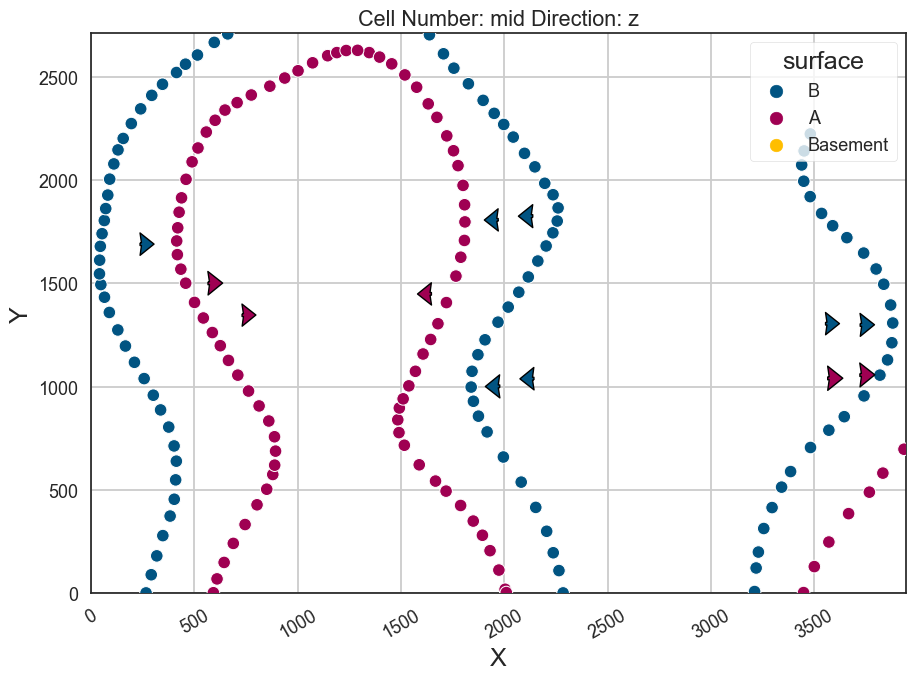

In [32]:
gp.plot_2d(geo_model, direction='z', show_lith=False, show_boundaries=False)
plt.grid()

<a id='plotting-the-input-data-in-3d'></a>

## Plotting the input data in 3D using PyVista

The input data can also be viszualized using the `pyvista` package. In this view, the interface points are visible as well as the orientations (marked as arrows) which indicate the normals of each orientation value. 

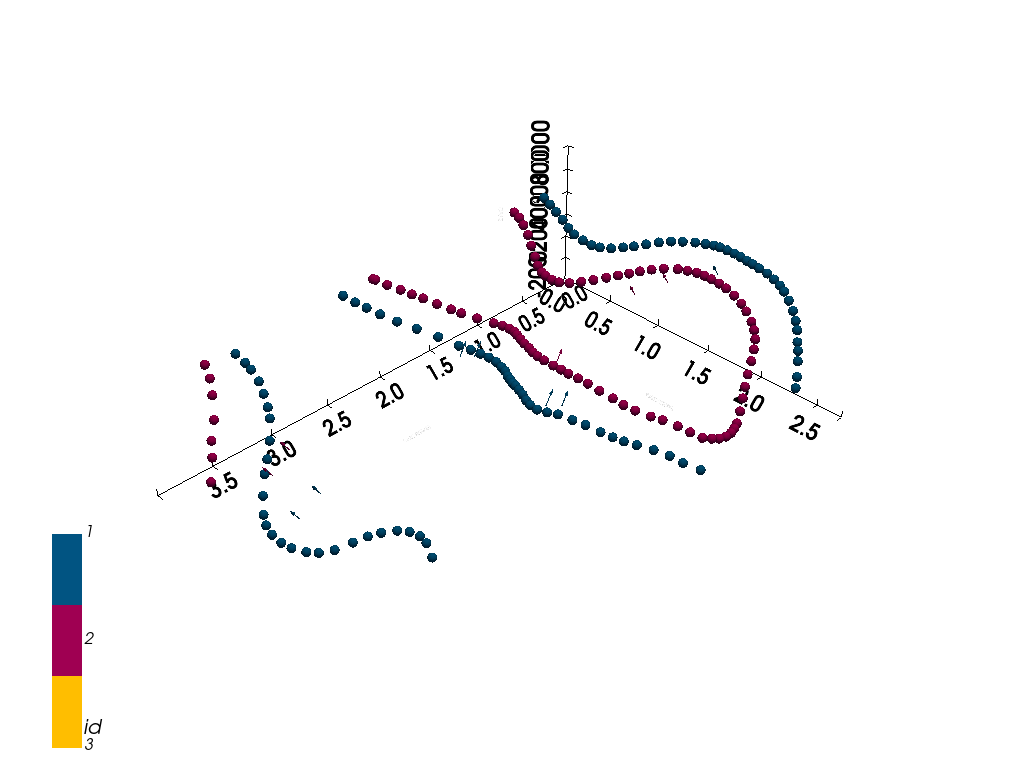

In [33]:
gp.plot_3d(geo_model, image=False, plotter_type='basic', notebook=True)

<a id='setting-the-interpolator'></a>
## Setting the interpolator

Once we have made sure that we have defined all our primary information, we can continue with the next step towards creating our geological model: preparing the input data for interpolation.

Setting the interpolator is necessary before computing the actual model. Here, the most important kriging parameters can be defined. 

In [34]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging=False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                    values
range             4931.88
$C_o$           579130.10
drift equations       [3]


<a id='computing-the-model'></a>

## Computing the model

At this point, we have all we need to compute our full model via `gp.compute_model()`. By default, this will return two separate solutions in the form of arrays. The first provides information on the lithological formations, the second on the fault network in the model, which is not present in this example. 

In [35]:
sol = gp.compute_model(geo_model, compute_mesh=True)

In [36]:
sol


Lithology ids 
  [3. 3. 3. ... 1. 1. 1.] 

In [37]:
geo_model.solutions


Lithology ids 
  [3. 3. 3. ... 1. 1. 1.] 

<a id='model-visualization-and-post-processing'></a>

# Model Visualization and Post-Processing

<a id='visualizing-cross-sections-of-the-computed-model'></a>

## Visulazing Cross Sections of the computed model

Cross sections in different `direction`s and at different `cell_number`s can be displayed. Here, we see the layers of the model in the different directions. 

The first section to be plotted is the custom section `Section1` followed by an array of cross sections.

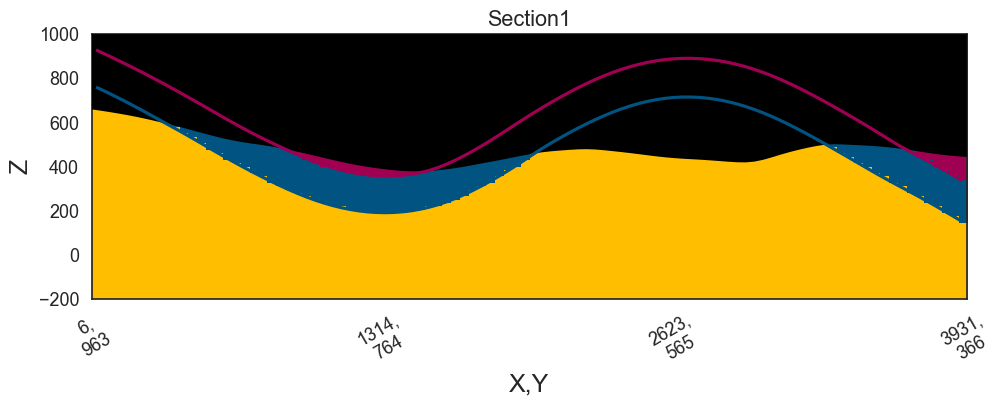

In [38]:
gp.plot_2d(geo_model, section_names=['Section1'], show_topography=True, show_data=False)

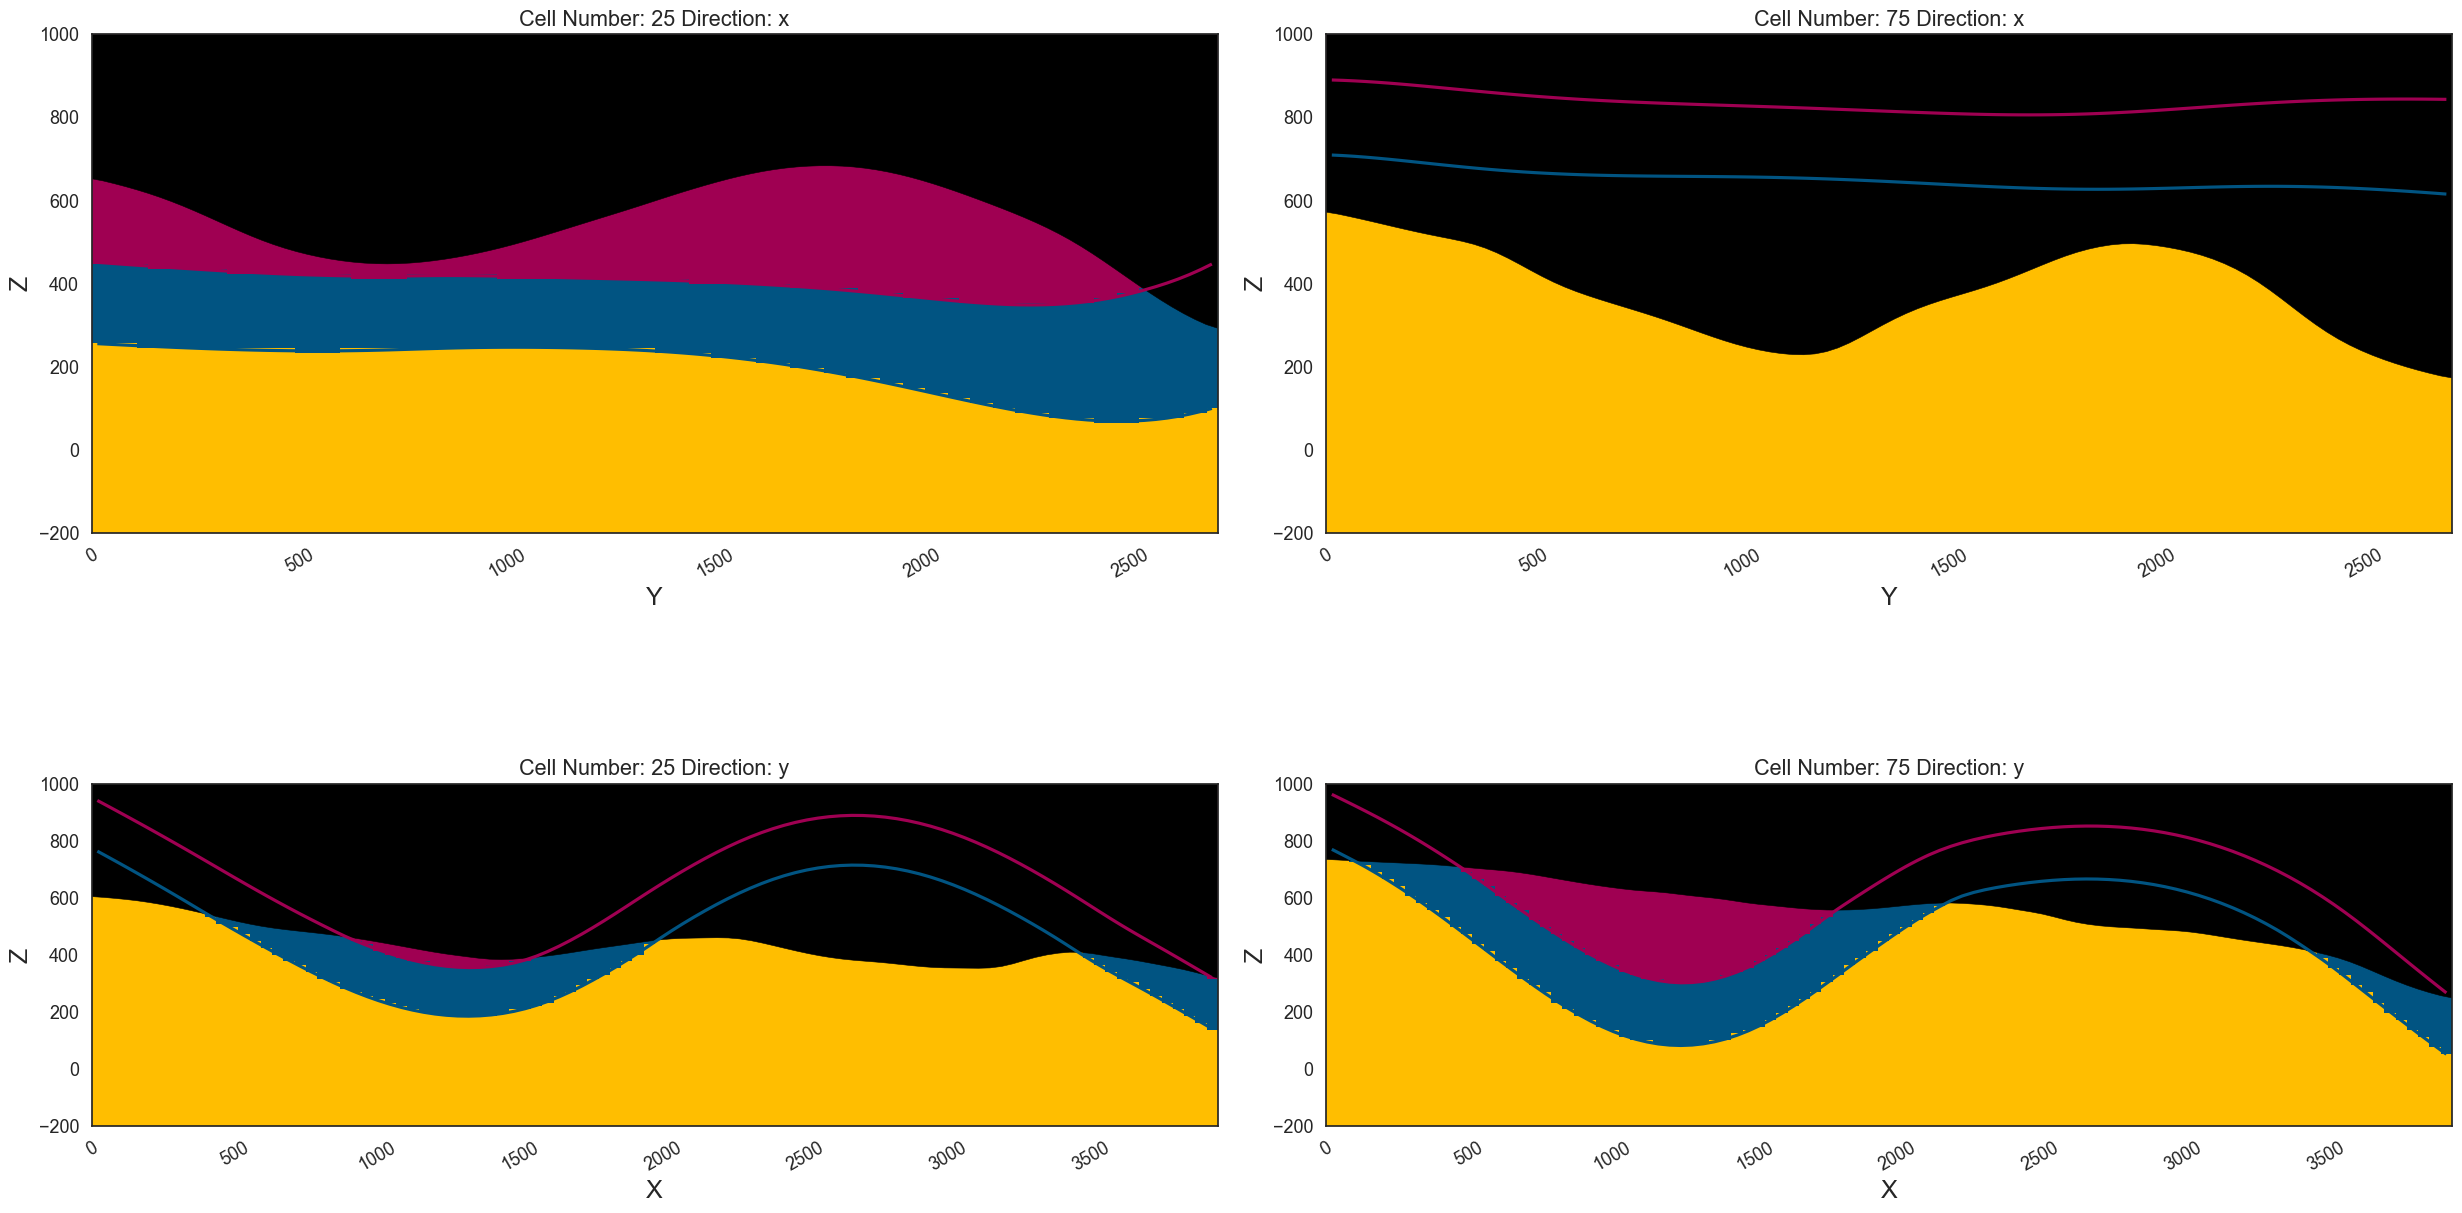

In [39]:
gp.plot_2d(geo_model, direction=['x', 'x', 'y', 'y'], cell_number=[25, 75, 25, 75], show_topography=True, show_data=False)

Next to the lithology data, we can also plot the calculated scalar field.

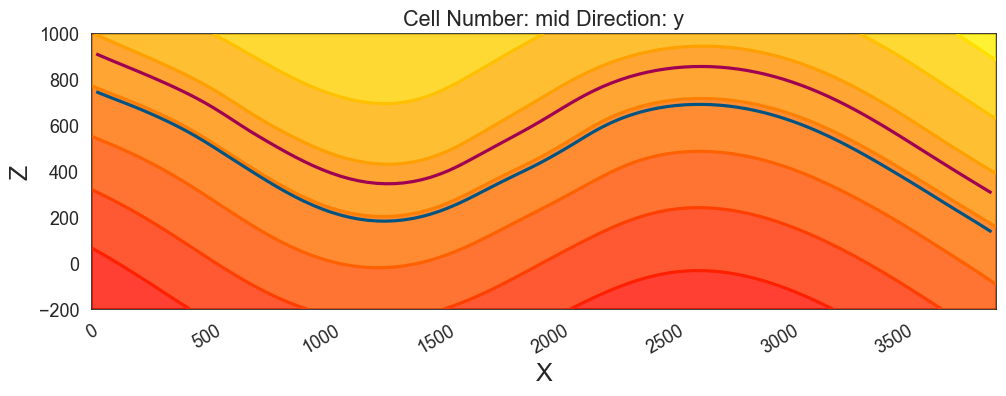

In [40]:
gp.plot_2d(geo_model, direction='y', show_data=False, show_scalar=True, show_lith=False)

<a id='visualizing-the-computed-model-in-3d'></a>

## Visualizing the computed model in 3D

The computed model can be visualized in 3D using the `pyvista` library. Setting `notebook=False` will open an interactive windows and the model can be rotated and zooming is possible. 

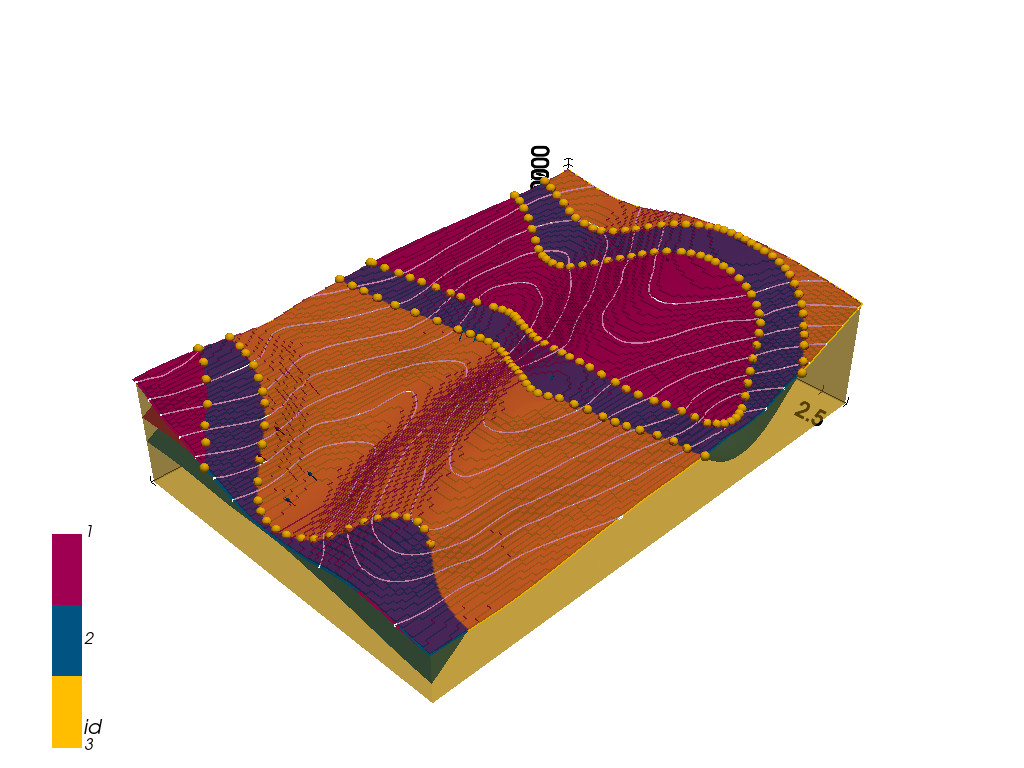

In [41]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=True)

<a id='post-processing'></a>

## Post Processing

Now that the model has been created, we would like to utilize it. In this notebook, you will learn how to extract the fold axis of folded structures, how to extract contour lines from a `PyVista` depth map and how to save the contour lines as GeoDataFrame, how to convert a depth map to an array or raster, respectively. Lastly, you will learn how to extract the contour lines from raster.

<a id='extracting-the-fold-axis'></a>

### Extracting the fold axis 

The fold axis is the line along which the dip of the layers equals 0. Due to the shape of the mesh, a threshold value of 5° degrees is chosen to illustrate the location of the fold axis. 

In [42]:
dict_all = gg.visualization.create_depth_maps_from_gempy(geo_model=geo_model,
                                                         surfaces=['A', 'B'])

dict_all

{'A': [PolyData (0x213827f6d00)
    N Cells:    12799
    N Points:   6765
    N Strips:   0
    X Bounds:   4.250e+02, 3.922e+03
    Y Bounds:   1.355e+01, 2.615e+03
    Z Bounds:   2.374e+02, 7.180e+02
    N Arrays:   1,
  '#9f0052'],
 'B': [PolyData (0x2138280c640)
    N Cells:    29559
    N Points:   15359
    N Strips:   0
    X Bounds:   4.587e+01, 3.922e+03
    Y Bounds:   1.355e+01, 2.696e+03
    Z Bounds:   -4.334e+01, 7.420e+02
    N Arrays:   1,
  '#015482']}

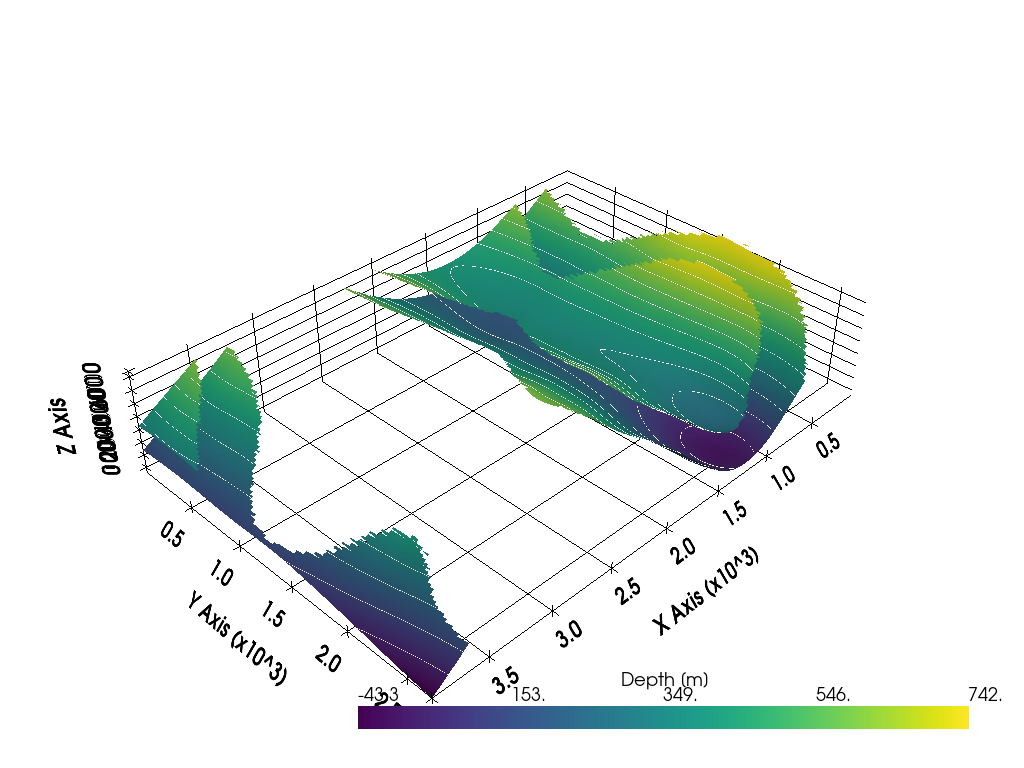

In [43]:
import pyvista as pv

p = pv.Plotter(notebook=True)

p.add_mesh(dict_all['A'][0], scalars='Depth [m]')
p.add_mesh(dict_all['A'][0].contour(), color='white')
p.add_mesh(dict_all['B'][0], scalars='Depth [m]')
p.add_mesh(dict_all['B'][0].contour(), color='white')
           
           
p.set_background('white')
p.show_grid(color='black')
p.show()

In [44]:
mesh = dict_all['B'][0]
mesh.compute_normals(inplace=True)

# Calculating the dips
dips = [90 - np.rad2deg(-np.arcsin(mesh['Normals'][i][2])) * (-1) for i in
        range(len(mesh['Normals']))]

# Calculating the azimuths
azimuths = [np.rad2deg(np.arctan(mesh['Normals'][i][0] / mesh['Normals'][i][1])) + 180 for i in
            range(len(mesh['Normals']))]

# Assigning dips and azimuths to scalars
mesh['Dips [°]'] = dips
mesh['Azimuths [°]'] = azimuths
mesh

PolyData (0x2138280c640)
  N Cells:    29559
  N Points:   15359
  N Strips:   0
  X Bounds:   4.587e+01, 3.922e+03
  Y Bounds:   1.355e+01, 2.696e+03
  Z Bounds:   -4.334e+01, 7.420e+02
  N Arrays:   5

In [45]:
indices = np.where(mesh['Dips [°]']<5)
indices[0][:10]

array([13753, 13754, 13755, 13756, 13757, 13758, 13759, 13760, 13761,
       13762], dtype=int64)

In [46]:
cells = mesh.cell_centers().points[indices]
cells[:10]

pyvista_ndarray([[1215.45      , 2434.48333333,    8.70547485],
                 [1228.59      , 2443.51666667,    7.51863098],
                 [1215.45      , 2461.58333333,    7.29632568],
                 [1228.59      , 2470.61666667,    6.37731934],
                 [1215.45      , 2488.68333333,    6.69577789],
                 [1228.59      , 2497.71666667,    6.06614685],
                 [1215.45      , 2515.78333333,    6.95542145],
                 [1228.59      , 2524.81666667,    6.63465118],
                 [1215.45      , 2542.88333333,    8.12190247],
                 [1228.59      , 2551.91666667,    8.12776947]])

In [47]:
polydata_cells = pv.PolyData(cells)
polydata_cells

PolyData,Information
N Cells,404
N Points,404
N Strips,0
X Bounds,"1.215e+03, 1.386e+03"
Y Bounds,"2.258e+01, 2.552e+03"
Z Bounds,"5.961e+00, 2.095e+02"
N Arrays,0


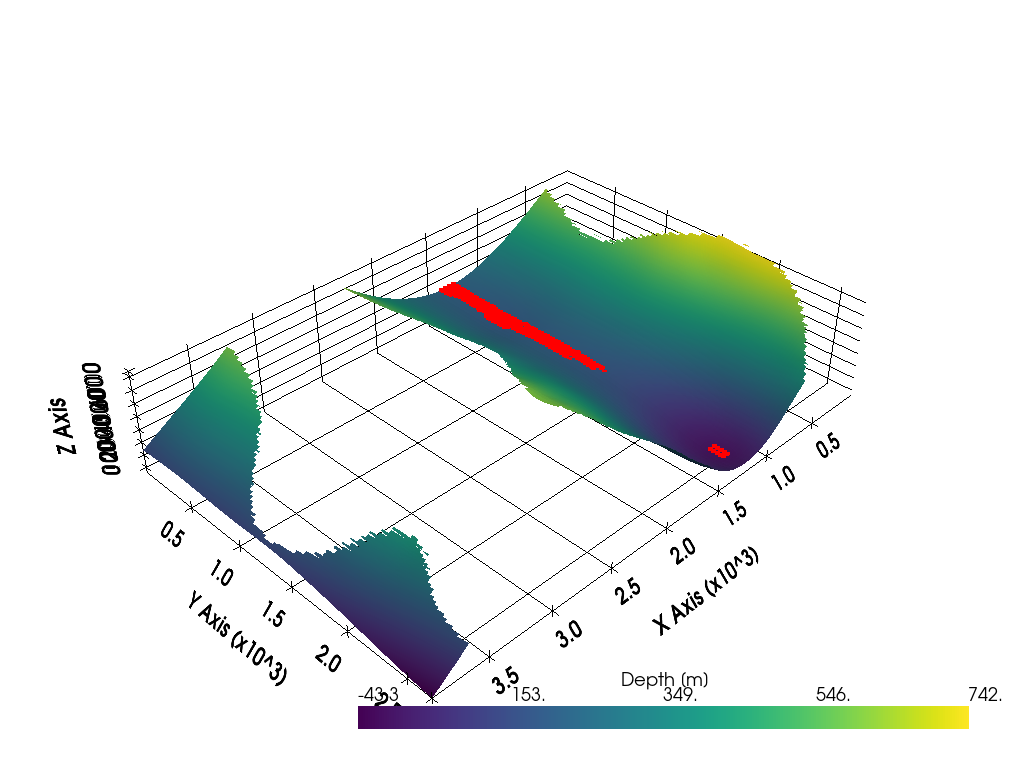

In [48]:
import pyvista as pv

p = pv.Plotter(notebook=True)

p.add_mesh(mesh)
p.add_mesh(polydata_cells, color='red')
        
           
p.set_background('white')
p.show_grid(color='black')
p.show()

<a id='extracting-contour-lines-from-pyvista-mesh'></a>

### Extracting contour lines from PyVista Mesh

Sometimes it is more practical to display contour lines instead of the depth map (as mesh). This section illustrates how to extract these from a `PyVista` mesh and how to save it as `GeoDataFrame` to export it as shape file. We will use `gg.vector.create_linestrings_from_contours()` to do that. 

In [49]:
contours = dict_all['B'][0].contour(np.arange(-200, 1000, 50))
contours

PolyData (0x21384677760)
  N Cells:    4181
  N Points:   4227
  N Strips:   0
  X Bounds:   1.306e+02, 3.922e+03
  Y Bounds:   1.355e+01, 2.696e+03
  Z Bounds:   0.000e+00, 7.000e+02
  N Arrays:   5

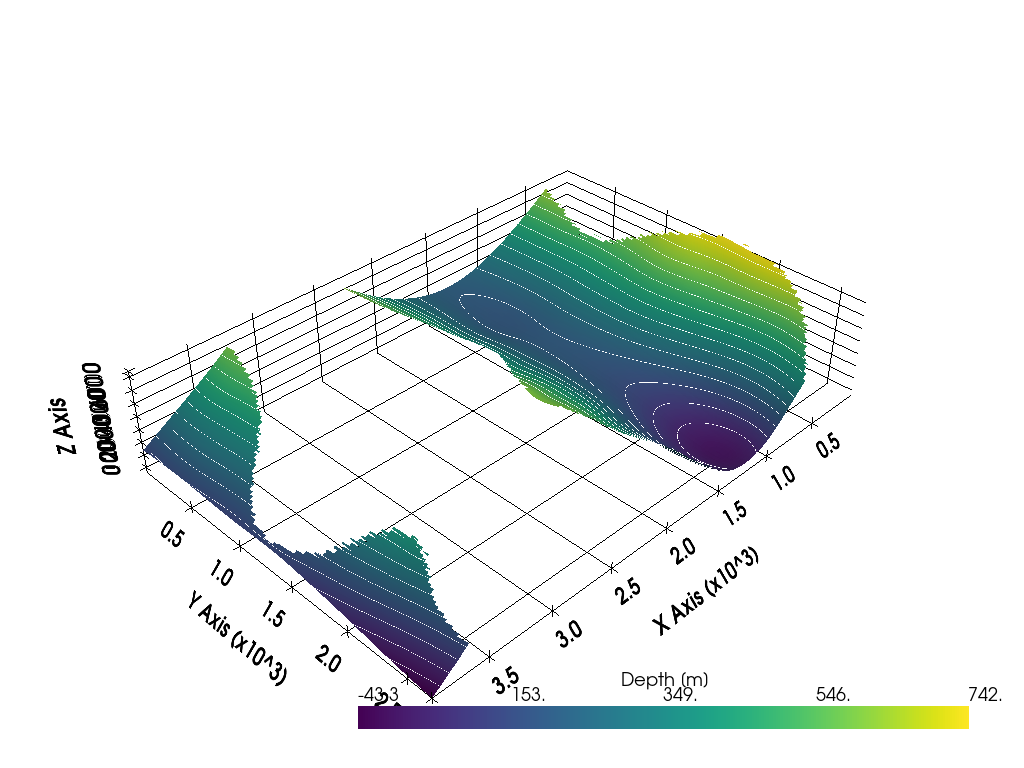

In [50]:
import pyvista as pv

p = pv.Plotter(notebook=True)

p.add_mesh(dict_all['B'][0], scalars='Depth [m]')
p.add_mesh(contours, color='white')
           
           
p.set_background('white')
p.show_grid(color='black')
p.show()

In [51]:
gdf_linestrings = gg.vector.create_linestrings_from_contours(contours=contours, 
                                                             return_gdf=True, 
                                                             crs='EPSG:4326')
gdf_linestrings

,geometry,Z
0,"LINESTRING Z (137.97000 1404.60080 700.00000, ...",700.00
1,"LINESTRING Z (136.40935 1422.75000 700.00000, ...",700.00
2,"LINESTRING Z (136.22826 1425.30332 700.00000, ...",700.00
3,"LINESTRING Z (134.33150 1449.85000 700.00000, ...",700.00
4,"LINESTRING Z (133.96969 1455.18391 700.00000, ...",700.00
...,...,...
4176,"LINESTRING Z (3896.81727 2479.65000 0.00000, 3...",0.00
4177,"LINESTRING Z (3888.18939 2527.50691 0.00000, 3...",0.00
4178,"LINESTRING Z (3891.84629 2506.75000 0.00000, 3...",0.00
4179,"LINESTRING Z (3884.30550 2550.25664 0.00000, 3...",0.00


<Axes: >

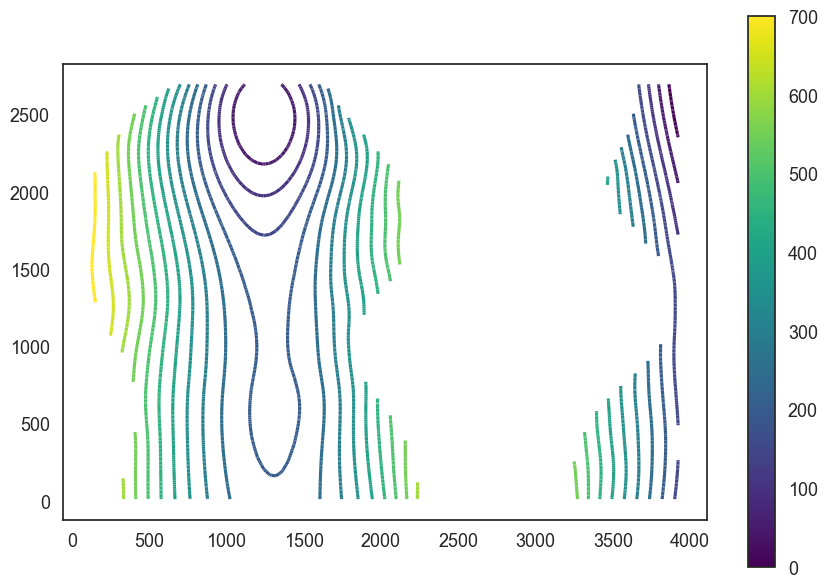

In [52]:
gdf_linestrings.plot(aspect=1, column='Z', cmap='viridis', legend=True)

<a id='converting-pyvista-mesh-to-array'></a>

### Converting PyVista Mesh to Array

Instead of displaying the depth map as mesh, we can also display the depth map as array which in return can be exported as .tif-file for a visualization in QGIS. 

In [53]:
z_values = gg.utils.extract_zmap_data(surface=mesh,
                                      cell_width=10)
z_values

array([[-9999.        , -9999.        , -9999.        , ...,
          -27.1322403 ,   -34.3528595 ,   -41.55630493],
       [-9999.        , -9999.        , -9999.        , ...,
          -26.16500854,   -33.37983322,   -40.58727264],
       [-9999.        , -9999.        , -9999.        , ...,
          -25.18828392,   -32.40851212,   -39.61490631],
       ...,
       [-9999.        , -9999.        , -9999.        , ...,
          151.27828979,   145.11914062,   138.95909119],
       [-9999.        , -9999.        , -9999.        , ...,
          150.53353882,   144.37231445,   138.20988464],
       [-9999.        , -9999.        , -9999.        , ...,
          149.79075623,   143.62550354,   137.46087646]])

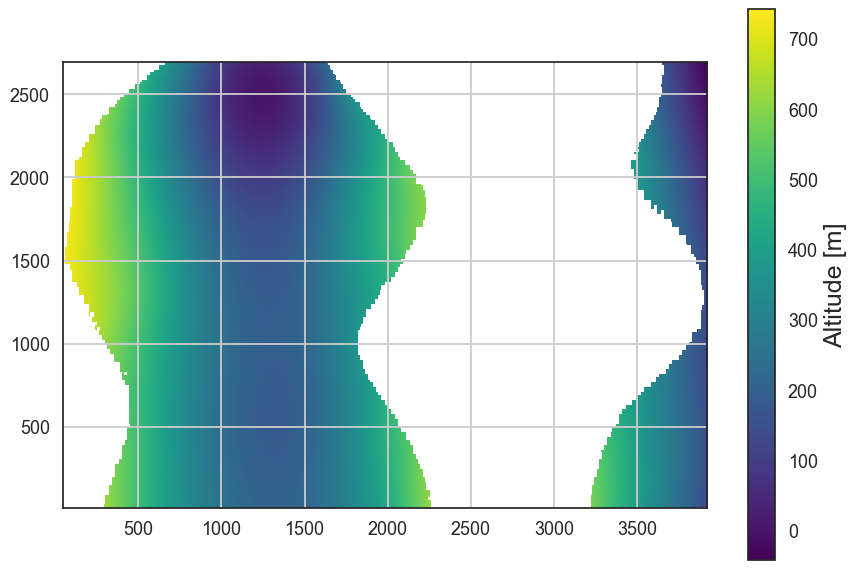

In [54]:
z_values[z_values == -9999] = np.nan
im = plt.imshow(z_values, cmap='viridis', extent=mesh.bounds[:4])
cbar = plt.colorbar(im)
cbar.set_label('Altitude [m]')
plt.grid()

In [55]:
gg.raster.save_as_tiff(raster=z_values,
                       path= file_path + 'output_raster.tif',
                       extent= list(mesh.bounds[:4]),
                       crs='EPSG:4326',
                       overwrite_file=True)

Raster successfully saved


<a id='extracting-contour-lines-from-raster'></a>

### Extracting Contour Lines from Raster/Array

Contour lines cannot only be extracted from a `PyVista` Mesh but also from the converted raster using `gg.raster.extract_contour_lines_from_raster()`. The results can be compared with the results of `gg.vector.create_linestrings_from_contours()`. 

In [56]:
z_values

array([[         nan,          nan,          nan, ..., -27.1322403 ,
        -34.3528595 , -41.55630493],
       [         nan,          nan,          nan, ..., -26.16500854,
        -33.37983322, -40.58727264],
       [         nan,          nan,          nan, ..., -25.18828392,
        -32.40851212, -39.61490631],
       ...,
       [         nan,          nan,          nan, ..., 151.27828979,
        145.11914062, 138.95909119],
       [         nan,          nan,          nan, ..., 150.53353882,
        144.37231445, 138.20988464],
       [         nan,          nan,          nan, ..., 149.79075623,
        143.62550354, 137.46087646]])

In [57]:
gdf_lines = gg.raster.extract_contour_lines_from_raster(raster= z_values,
                                     extent=mesh.bounds[:4],
                                     target_crs='EPSG:4326',
                                     interval = 50)
gdf_lines.head()

Raster successfully saved


,geometry,Z
0,"LINESTRING (3855.17396 2686.43918, 3856.49758 ...",0
1,"LINESTRING (1106.48469 2686.43918, 1104.89136 ...",50
2,"LINESTRING (3788.16978 2686.43918, 3789.46350 ...",50
3,"LINESTRING (994.62988 2686.43918, 990.18677 26...",100
4,"LINESTRING (3723.01682 2686.43918, 3724.28781 ...",100


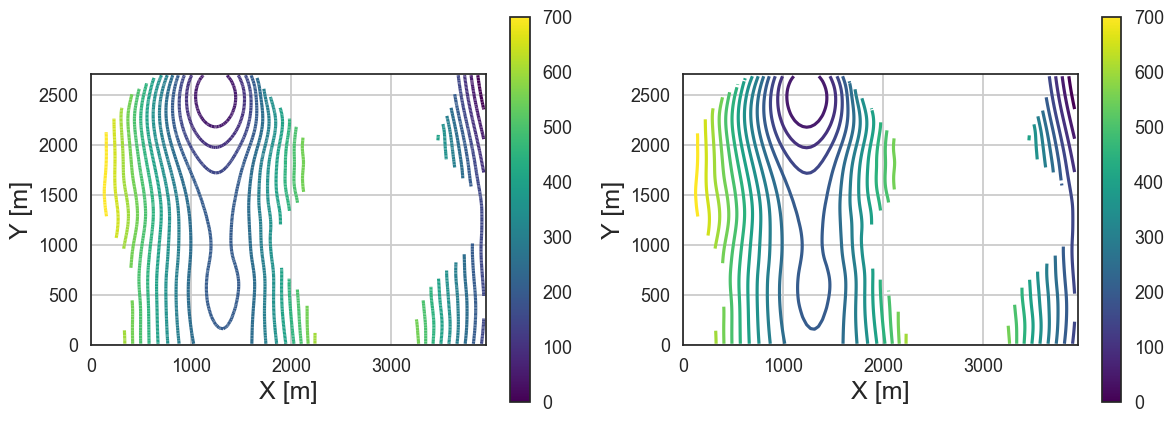

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 5))


gdf_linestrings.plot(ax=ax1, aspect=1, column='Z', cmap='viridis', legend=True)

ax1.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]')
ax1.set_xlim(0, 3942)
ax1.set_ylim(0, 2710)
ax1.grid()

gdf_lines.plot(ax=ax2, aspect=1, column='Z', cmap='viridis', legend=True)

ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.set_xlim(0, 3942)
ax2.set_ylim(0, 2710)
ax2.grid()

<a id='conclusions'></a>
# Conclusions

<div class="alert alert-block alert-success">
<b>In this tutorial, you have learnt the following:</b> <br>
- How to build your fourth <b>GemPy</b> model with input data generated through <b>GemGIS</b><br>
- How to build a GemPy model with folded layers<br>
- How to obtain the the fold axis of a structure<br>
- How to extract contour lines from a <b>PyVista</b> depth map and to save them as GeoDataFrame<br>
- How to convert a depth map to an array/raster<br>
- How to convert contour lines from that raster<br>
</div>

<a id='outlook'></a>
# Outlook

<div class="alert alert-block alert-success">
<b>In the next tutorial, you will learn the following:</b> <br>
- How to build your fifth GemPy model with input data generated through GemGIS<br>
- How to sample rasters (interfaces/orientations) <br>
- How to calculate raster properties and how to perform raster operations<br>
- How to visualize the input data in <b>PyVista</b><br>


</div>

[Take me to the next notebook on Github](https://github.com/cgre-aachen/gemgis_data/blob/main/notebooks/03_folded_layers/example02_folded_layers.ipynb)

<img src="../../data/images/example7/cover_example07.png" />
Source: Bennison, G.M. (1988): An Introduction to Geological Structures and Maps, page 26, figure 11, Springer Verlag Berlin, Heidelberg, New York, ISBN: 978-1-4615-9632-5


<a id='licensing'></a>

## Licensing

Institute for Computational Geoscience, Geothermics and Reservoir Geophysics, RWTH Aachen University & Fraunhofer IEG, Fraunhofer Research Institution for Energy Infrastructures and Geothermal Systems IEG, Authors: Alexander Juestel. For more information contact: alexander.juestel(at)ieg.fraunhofer.de

All notebooks are licensed under a Creative Commons Attribution 4.0 International License (CC BY 4.0, http://creativecommons.org/licenses/by/4.0/). References for each displayed map are provided. Most of the maps originate from the books of [Powell (1992)](https://link.springer.com/book/9783540586074) and [Bennison (1990)](https://link.springer.com/book/10.1007/978-1-4615-9630-1). References for maps with unknown origin will gladly be added.